## CHO

In [1]:
import csv
import numpy as np
import pandas as pd

with open('cho.txt', 'r') as in_file:
    stripped = (line.strip() for line in in_file)
    lines = (line.split('\t') for line in stripped if line)
    with open('test.csv', 'w') as out_file:
        writer = csv.writer(out_file)
#         writer.writerow(('title', 'intro'))
        writer.writerows(lines)
    
data = pd.read_csv("test.csv",header=None)

print(data)

# i=0
# while(i<len(data)):
#     if(data.iloc[i][1]==-1):
#         data.drop(data.index[i],inplace=True)
#         continue
#     else:
#         i=i+1
        
print(data.shape)

import numpy as np
data_clean = np.zeros((data.shape[0],data.shape[1]-2))
for i in range(len(data)):
    for j in range(2,len(data.iloc[i])):
            data_clean[i][j-2] = data.iloc[i][j]
print(data_clean) 

print(data_clean.shape)

      0   1      2      3      4      5      6      7      8     9      10  \
0      1   1 -0.690 -0.960 -1.160 -0.660 -0.550  0.120 -1.070 -1.22  0.820   
1      2   1 -0.210  0.190  0.860  0.040 -0.350 -0.390 -0.510 -0.20  0.000   
2      3   1 -0.300 -0.560 -0.290 -0.500 -0.270 -0.290 -0.560 -1.04  0.320   
3      4   1  0.070  0.260 -0.470 -0.680 -0.630 -0.390  0.070  0.79  0.580   
4      5   1 -1.040  0.130  0.510 -0.440 -0.880 -0.320  0.210  0.95  1.070   
5      6   1 -1.170  0.090 -0.520 -1.040 -1.160 -0.830  0.170  0.93  0.890   
6      7   1 -0.160  0.350 -0.130 -0.260 -0.400 -0.470  0.100  0.74  0.450   
7      8   1 -0.890  0.770 -0.250 -0.710 -0.330  0.050 -0.150 -0.42  0.680   
8      9   1 -0.180  0.140 -0.040 -0.760 -0.680 -0.530 -0.370  0.19  0.810   
9     10   1 -0.420 -0.570  0.080 -0.440 -0.360 -0.180 -0.150  0.56  0.630   
10    11   1 -0.150  0.320  0.230 -0.760 -1.160 -0.900 -0.230  0.28  0.450   
11    12   1 -1.180 -1.020 -1.740 -1.690 -0.820 -0.190 -0.310  0

[[-0.69  -0.96  -1.16  ... -0.04   0.19   0.82 ]
 [-0.21   0.19   0.86  ... -1.23  -0.325  0.   ]
 [-0.3   -0.56  -0.29  ... -0.12  -0.16   0.67 ]
 ...
 [-3.12  -4.12  -3.54  ...  1.48   2.06   2.36 ]
 [-0.79  -0.56  -0.79  ...  0.49   0.08   0.15 ]
 [-1.16  -1.39  -0.96  ...  0.493  1.27   0.87 ]]
(386, 16)


In [2]:
def regionQuery(D, P, eps):
    neighbors = []
    for Pn in range(0, len(D)):
        sum=0
        dist=0
#         if numpy.linalg.norm(D[P] - D[Pn]) < eps:
        for i in range(len(D[Pn])):
            sum=sum+((D[P][i]-D[Pn][i])**2)
        dist=sum**0.5
#         print(dist)
        if(dist<=eps):
#             print(dist)
            neighbors.append(Pn)
#     print(neighbors)
    return neighbors
    
def expandCluster(D, visited, labels, P, NeighborPts, C, eps, MinPts):

    labels[P] = C
    i = 0
    while i < len(NeighborPts): 
        print("len nightborpoitns: ",len(NeighborPts))
        Pn = NeighborPts[i]
        if(visited[Pn]==0):
            visited[Pn] = 1  
#         if labels[Pn] == -1:
#            labels[Pn] = C
#         elif labels[Pn] == 0:
#             labels[Pn] = C
            PnNeighborPts = regionQuery(D, Pn, eps)
            if len(PnNeighborPts) >= MinPts:
                NeighborPts = NeighborPts + PnNeighborPts
        if(labels[Pn] == 0 or labels[Pn] == -1):
            labels[Pn] = C
        i += 1
               
    return visited, labels





In [3]:
def dbscan(D, eps, MinPts):
    labels = [0]*len(D)
    visited = [0]*len(D)
    C = 0
    for P in range(0, len(D)):
        print("P: ",P)
#         if not (labels[P] == 0):
#             continue
#         print(visited)
#         print(labels)
        if(visited[P]==1):
            continue 
        visited[P]=1    
        NeighborPts = regionQuery(D, P, eps)    
        if(len(NeighborPts) < MinPts):
            labels[P] = -1
        else: 
            C += 1
            visited, labels = expandCluster(D, visited, labels, P, NeighborPts, C, eps, MinPts) 

    return labels

In [10]:
labels = dbscan(data_clean,1.1,3)

P:  0
P:  1
P:  2
P:  3
len nightborpoitns:  7
len nightborpoitns:  7
len nightborpoitns:  7
len nightborpoitns:  11
len nightborpoitns:  14
len nightborpoitns:  18
len nightborpoitns:  21
len nightborpoitns:  25
len nightborpoitns:  25
len nightborpoitns:  25
len nightborpoitns:  25
len nightborpoitns:  25
len nightborpoitns:  25
len nightborpoitns:  25
len nightborpoitns:  25
len nightborpoitns:  25
len nightborpoitns:  25
len nightborpoitns:  29
len nightborpoitns:  29
len nightborpoitns:  29
len nightborpoitns:  29
len nightborpoitns:  29
len nightborpoitns:  29
len nightborpoitns:  36
len nightborpoitns:  36
len nightborpoitns:  36
len nightborpoitns:  36
len nightborpoitns:  36
len nightborpoitns:  36
len nightborpoitns:  36
len nightborpoitns:  42
len nightborpoitns:  48
len nightborpoitns:  48
len nightborpoitns:  56
len nightborpoitns:  56
len nightborpoitns:  61
len nightborpoitns:  61
len nightborpoitns:  64
len nightborpoitns:  64
len nightborpoitns:  64
len nightborpoitns:

len nightborpoitns:  740
len nightborpoitns:  744
len nightborpoitns:  744
len nightborpoitns:  744
len nightborpoitns:  748
len nightborpoitns:  748
len nightborpoitns:  748
len nightborpoitns:  748
len nightborpoitns:  748
len nightborpoitns:  748
len nightborpoitns:  748
len nightborpoitns:  748
len nightborpoitns:  748
len nightborpoitns:  748
len nightborpoitns:  748
len nightborpoitns:  748
len nightborpoitns:  748
len nightborpoitns:  748
len nightborpoitns:  748
len nightborpoitns:  753
len nightborpoitns:  753
len nightborpoitns:  753
len nightborpoitns:  753
len nightborpoitns:  753
len nightborpoitns:  753
len nightborpoitns:  753
len nightborpoitns:  753
len nightborpoitns:  753
len nightborpoitns:  753
len nightborpoitns:  753
len nightborpoitns:  753
len nightborpoitns:  753
len nightborpoitns:  753
len nightborpoitns:  753
len nightborpoitns:  753
len nightborpoitns:  753
len nightborpoitns:  753
len nightborpoitns:  753
len nightborpoitns:  768
len nightborpoitns:  768


len nightborpoitns:  1153
len nightborpoitns:  1153
len nightborpoitns:  1153
len nightborpoitns:  1153
len nightborpoitns:  1153
len nightborpoitns:  1153
len nightborpoitns:  1153
len nightborpoitns:  1153
len nightborpoitns:  1153
len nightborpoitns:  1153
len nightborpoitns:  1153
len nightborpoitns:  1153
len nightborpoitns:  1153
len nightborpoitns:  1153
len nightborpoitns:  1153
len nightborpoitns:  1153
len nightborpoitns:  1153
len nightborpoitns:  1153
len nightborpoitns:  1153
len nightborpoitns:  1153
len nightborpoitns:  1153
len nightborpoitns:  1153
len nightborpoitns:  1153
len nightborpoitns:  1153
len nightborpoitns:  1153
len nightborpoitns:  1153
len nightborpoitns:  1153
len nightborpoitns:  1153
len nightborpoitns:  1153
len nightborpoitns:  1153
len nightborpoitns:  1153
len nightborpoitns:  1153
len nightborpoitns:  1153
len nightborpoitns:  1153
len nightborpoitns:  1153
len nightborpoitns:  1153
len nightborpoitns:  1153
len nightborpoitns:  1153
len nightbor

len nightborpoitns:  1253
len nightborpoitns:  1253
len nightborpoitns:  1253
len nightborpoitns:  1253
len nightborpoitns:  1253
len nightborpoitns:  1253
len nightborpoitns:  1253
len nightborpoitns:  1253
len nightborpoitns:  1253
len nightborpoitns:  1253
len nightborpoitns:  1253
len nightborpoitns:  1253
len nightborpoitns:  1253
len nightborpoitns:  1253
len nightborpoitns:  1253
len nightborpoitns:  1253
len nightborpoitns:  1253
len nightborpoitns:  1253
len nightborpoitns:  1253
len nightborpoitns:  1253
len nightborpoitns:  1253
len nightborpoitns:  1253
len nightborpoitns:  1253
len nightborpoitns:  1257
len nightborpoitns:  1257
len nightborpoitns:  1257
len nightborpoitns:  1257
len nightborpoitns:  1257
len nightborpoitns:  1257
len nightborpoitns:  1257
len nightborpoitns:  1271
len nightborpoitns:  1271
len nightborpoitns:  1271
len nightborpoitns:  1275
len nightborpoitns:  1275
len nightborpoitns:  1275
len nightborpoitns:  1275
len nightborpoitns:  1275
len nightbor

P:  126
P:  127
P:  128
P:  129
P:  130
P:  131
P:  132
P:  133
P:  134
P:  135
P:  136
P:  137
P:  138
P:  139
P:  140
P:  141
P:  142
P:  143
P:  144
P:  145
P:  146
P:  147
P:  148
P:  149
P:  150
P:  151
P:  152
P:  153
P:  154
P:  155
P:  156
P:  157
P:  158
P:  159
P:  160
P:  161
P:  162
P:  163
P:  164
P:  165
P:  166
P:  167
P:  168
P:  169
P:  170
P:  171
P:  172
P:  173
P:  174
P:  175
P:  176
P:  177
P:  178
P:  179
P:  180
P:  181
P:  182
P:  183
P:  184
P:  185
P:  186
P:  187
P:  188
P:  189
P:  190
P:  191
P:  192
P:  193
P:  194
P:  195
P:  196
P:  197
P:  198
P:  199
P:  200
P:  201
P:  202
P:  203
P:  204
P:  205
P:  206
P:  207
P:  208
P:  209
P:  210
P:  211
P:  212
P:  213
P:  214
P:  215
P:  216
P:  217
P:  218
P:  219
P:  220
P:  221
P:  222
P:  223
P:  224
P:  225
P:  226
P:  227
P:  228
P:  229
P:  230
P:  231
P:  232
P:  233
P:  234
P:  235
P:  236
P:  237
P:  238
P:  239
P:  240
P:  241
P:  242
P:  243
P:  244
P:  245
P:  246
P:  247
P:  248
P:  249
P:  250


In [11]:
print(labels)

[-1, -1, -1, 1, -1, -1, 1, -1, 1, -1, 1, -1, -1, -1, 2, 2, 2, -1, -1, 2, -1, 2, -1, -1, 1, -1, -1, -1, 1, -1, -1, 1, 2, 2, 2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 2, -1, 2, 2, -1, 2, 1, -1, -1, -1, -1, -1, 2, -1, -1, 1, -1, -1, 3, 4, -1, 1, -1, 1, -1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1, 2, 1, 1, 1, 1, 1, -1, 1, -1, 1, -1, -1, -1, -1, -1, -1, 1, -1, -1, 1, -1, -1, 2, 1, 1, 1, 1, -1, 1, 1, -1, 1, 1, 1, 2, 1, 1, 4, 1, -1, -1, 1, 4, 1, 1, -1, -1, 1, 1, -1, 1, -1, 1, -1, 1, 1, 1, -1, 1, -1, 1, -1, 1, 1, 1, -1, -1, -1, -1, -1, 1, 1, -1, 1, 1, -1, -1, -1, 2, -1, -1, 1, 1, -1, 1, -1, 1, -1, 1, 1, 1, 1, -1, -1, -1, -1, 1, 1, 1, -1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1, 1, 1, 1, -1, 1, 2, 1, 1, 1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, 1, 1, 1, 1, 1, -1, 1, 1, -1, 1, 1, -1, -1, 1, 1, 1, 1, 1, 1, 5, -1, 1, 1, 1, 1, 1, -1, 1, 1, 3, 

In [195]:
# a = defaultdict(list)
# b = defaultdict(list)

# a[1].append(4)
# a[1].append(5)

# b[2].append(3)
# b[2].append(4)

# # a=b
# print(len(a[1]))

In [12]:
cluslist = labels.copy()
gtcluslist = list(data.iloc[:,1])
# print(gtcluslist)

P = np.zeros((len(gtcluslist),len(gtcluslist)))
C = np.zeros((len(cluslist),len(cluslist)))

for i in range(len(cluslist)):
    for j in range(i,len(cluslist)):
        if(i==j):
            C[i][j] = 1    
        elif(cluslist[i]==cluslist[j]):
            C[i][j] = 1
            C[j][i] = 1
            
for i in range(len(gtcluslist)):
    for j in range(i,len(gtcluslist)):
        if(i==j):
            P[i][j] = 1    
        elif(gtcluslist[i]==gtcluslist[j]):
            P[i][j] = 1
            P[j][i] = 1
          
        
MTP, MTN, MFP, MFN = 0,0,0,0

for i in range(len(P)):
    for j in range(len(P[0])):
        if(C[i][j]==1 and P[i][j]==1):
            MTP += 1
        elif(C[i][j]==0 and P[i][j]==0):
            MTN += 1
        elif(C[i][j]==1 and P[i][j]==0):
            MFP += 1
        elif(C[i][j]==0 and P[i][j]==1):
            MFN += 1
            
            
rand_index = (MTP+MTN)/(MTP+MTN+MFP+MFN)    

jaccard = (MTP)/(MTP+MFP+MFN)

print("Rand index: ",rand_index)
print("Jaccard index: ",jaccard)


        

Rand index:  0.5664715831297484
Jaccard index:  0.2037425112793077


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


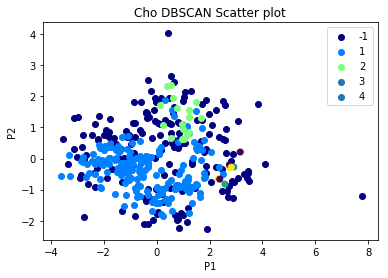

In [14]:
from sklearn.decomposition import PCA
import matplotlib
import matplotlib.pyplot as plt


pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_clean)
# print(data_pca)



x = data_pca[:,0]
y = data_pca[:,1]
classes = np.unique(labels)
colors = [plt.cm.jet(i/float(len(classes)-1)) for i in range(len(classes))]
for i, u in enumerate(classes):
    xi = [x[j] for j  in range(len(x)) if labels[j] == u]
    yi = [y[j] for j  in range(len(x)) if labels[j] == u]
    plt.scatter(xi, yi, c=colors[i], label=str(u))
plt.legend()
plt.title('Cho DBSCAN Scatter plot')
plt.xlabel('P1')
plt.ylabel('P2')

# plt.show()
# fig = plt.figure()
plt.savefig('Cho DBSCAN Scatter plot.png')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

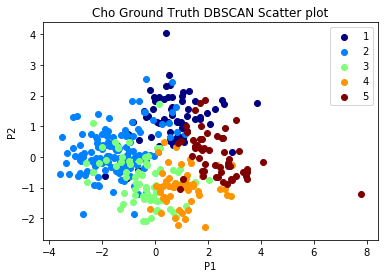

In [3]:
x = data_pca[:,0]
y = data_pca[:,1]
classes = np.unique(gtcluslist)
colors = [plt.cm.jet(i/float(len(classes)-1)) for i in range(len(classes))]
for i, u in enumerate(classes):
    xi = [x[j] for j  in range(len(x)) if gtcluslist[j] == u]
    yi = [y[j] for j  in range(len(x)) if gtcluslist[j] == u]
    plt.scatter(xi, yi, c=colors[i], label=str(u))
plt.legend()
plt.title('Cho Ground Truth DBSCAN Scatter plot')
plt.xlabel('P1')
plt.ylabel('P2')

# plt.show()
# fig = plt.figure()
plt.savefig('Cho Ground Truth DBSCAN Scatter plot.png')

## IYER

In [4]:
import csv
import numpy as np
import pandas as pd

with open('iyer.txt', 'r') as in_file:
    stripped = (line.strip() for line in in_file)
    lines = (line.split('\t') for line in stripped if line)
    with open('test.csv', 'w') as out_file:
        writer = csv.writer(out_file)
#         writer.writerow(('title', 'intro'))
        writer.writerows(lines)
    
data = pd.read_csv("test.csv",header=None)

print(data)

# i=0
# while(i<len(data)):
#     if(data.iloc[i][1]==-1):
#         data.drop(data.index[i],inplace=True)
#         continue
#     else:
#         i=i+1
        
print(data.shape)

import numpy as np
data_clean = np.zeros((data.shape[0],data.shape[1]-2))
for i in range(len(data)):
    for j in range(2,len(data.iloc[i])):
            data_clean[i][j-2] = data.iloc[i][j]
print(data_clean) 

print(data_clean.shape)

      0   1    2     3     4      5      6      7      8      9     10    11  \
0      1  -1  1.0  0.72  0.10   0.57   1.08   0.66   0.39   0.49  0.28  0.50   
1      2   1  1.0  1.58  1.05   1.15   1.22   0.54   0.73   0.82  0.82  0.90   
2      3   1  1.0  1.10  0.97   1.00   0.90   0.67   0.81   0.88  0.77  0.71   
3      4   1  1.0  0.97  1.00   0.85   0.84   0.72   0.66   0.68  0.47  0.61   
4      5   1  1.0  1.21  1.29   1.08   0.89   0.88   0.66   0.85  0.67  0.58   
5      6   1  1.0  1.45  1.44   1.12   1.10   1.15   0.79   0.77  0.78  0.71   
6      7   1  1.0  1.15  1.10   1.00   1.08   0.79   0.98   1.03  0.59  0.57   
7      8   1  1.0  1.32  1.35   1.13   1.00   0.91   1.22   1.05  0.58  0.57   
8      9   1  1.0  1.01  1.38   1.21   0.79   0.85   0.78   0.73  0.64  0.58   
9     10   1  1.0  0.85  1.03   1.00   0.81   0.82   0.73   0.51  0.24  0.54   
10    11   1  1.0  1.12  0.92   1.01   0.86   0.86   0.70   0.62  0.36  0.37   
11    12   1  1.0  1.23  1.21   0.95   0

In [ ]:
labels = dbscan(data_clean,1.1,3)

P:  0
len nightborpoitns:  112
len nightborpoitns:  112
len nightborpoitns:  364
len nightborpoitns:  545
len nightborpoitns:  729
len nightborpoitns:  972
len nightborpoitns:  1197
len nightborpoitns:  1350
len nightborpoitns:  1544
len nightborpoitns:  1746
len nightborpoitns:  1941
len nightborpoitns:  2172
len nightborpoitns:  2417
len nightborpoitns:  2638
len nightborpoitns:  2878
len nightborpoitns:  3127
len nightborpoitns:  3369
len nightborpoitns:  3618
len nightborpoitns:  3862
len nightborpoitns:  4100
len nightborpoitns:  4345
len nightborpoitns:  4576
len nightborpoitns:  4737
len nightborpoitns:  4975
len nightborpoitns:  5216
len nightborpoitns:  5448
len nightborpoitns:  5592
len nightborpoitns:  5766
len nightborpoitns:  5938
len nightborpoitns:  6169
len nightborpoitns:  6368
len nightborpoitns:  6614
len nightborpoitns:  6815
len nightborpoitns:  7022
len nightborpoitns:  7199
len nightborpoitns:  7421
len nightborpoitns:  7581
len nightborpoitns:  7807
len nightbor

len nightborpoitns:  48851
len nightborpoitns:  48939
len nightborpoitns:  48939
len nightborpoitns:  49112
len nightborpoitns:  49280
len nightborpoitns:  49424
len nightborpoitns:  49606
len nightborpoitns:  49740
len nightborpoitns:  49919
len nightborpoitns:  50087
len nightborpoitns:  50309
len nightborpoitns:  50472
len nightborpoitns:  50649
len nightborpoitns:  50649
len nightborpoitns:  50649
len nightborpoitns:  50649
len nightborpoitns:  50649
len nightborpoitns:  50649
len nightborpoitns:  50649
len nightborpoitns:  50649
len nightborpoitns:  50649
len nightborpoitns:  50649
len nightborpoitns:  50649
len nightborpoitns:  50649
len nightborpoitns:  50649
len nightborpoitns:  50649
len nightborpoitns:  50649
len nightborpoitns:  50649
len nightborpoitns:  50649
len nightborpoitns:  50649
len nightborpoitns:  50649
len nightborpoitns:  50649
len nightborpoitns:  50649
len nightborpoitns:  50649
len nightborpoitns:  50649
len nightborpoitns:  50649
len nightborpoitns:  50649
l

len nightborpoitns:  51019
len nightborpoitns:  51019
len nightborpoitns:  51019
len nightborpoitns:  51019
len nightborpoitns:  51019
len nightborpoitns:  51019
len nightborpoitns:  51019
len nightborpoitns:  51019
len nightborpoitns:  51019
len nightborpoitns:  51019
len nightborpoitns:  51019
len nightborpoitns:  51019
len nightborpoitns:  51019
len nightborpoitns:  51019
len nightborpoitns:  51019
len nightborpoitns:  51019
len nightborpoitns:  51019
len nightborpoitns:  51019
len nightborpoitns:  51019
len nightborpoitns:  51019
len nightborpoitns:  51019
len nightborpoitns:  51019
len nightborpoitns:  51019
len nightborpoitns:  51019
len nightborpoitns:  51019
len nightborpoitns:  51019
len nightborpoitns:  51019
len nightborpoitns:  51019
len nightborpoitns:  51019
len nightborpoitns:  51019
len nightborpoitns:  51019
len nightborpoitns:  51019
len nightborpoitns:  51019
len nightborpoitns:  51019
len nightborpoitns:  51019
len nightborpoitns:  51019
len nightborpoitns:  51019
l

len nightborpoitns:  51082
len nightborpoitns:  51082
len nightborpoitns:  51082
len nightborpoitns:  51082
len nightborpoitns:  51082
len nightborpoitns:  51082
len nightborpoitns:  51082
len nightborpoitns:  51082
len nightborpoitns:  51082
len nightborpoitns:  51082
len nightborpoitns:  51082
len nightborpoitns:  51082
len nightborpoitns:  51082
len nightborpoitns:  51082
len nightborpoitns:  51082
len nightborpoitns:  51082
len nightborpoitns:  51082
len nightborpoitns:  51082
len nightborpoitns:  51082
len nightborpoitns:  51082
len nightborpoitns:  51082
len nightborpoitns:  51082
len nightborpoitns:  51082
len nightborpoitns:  51082
len nightborpoitns:  51082
len nightborpoitns:  51082
len nightborpoitns:  51082
len nightborpoitns:  51082
len nightborpoitns:  51082
len nightborpoitns:  51082
len nightborpoitns:  51082
len nightborpoitns:  51082
len nightborpoitns:  51082
len nightborpoitns:  51082
len nightborpoitns:  51082
len nightborpoitns:  51082
len nightborpoitns:  51082
l

len nightborpoitns:  51647
len nightborpoitns:  51647
len nightborpoitns:  51647
len nightborpoitns:  51647
len nightborpoitns:  51647
len nightborpoitns:  51647
len nightborpoitns:  51647
len nightborpoitns:  51647
len nightborpoitns:  51647
len nightborpoitns:  51647
len nightborpoitns:  51647
len nightborpoitns:  51647
len nightborpoitns:  51647
len nightborpoitns:  51647
len nightborpoitns:  51647
len nightborpoitns:  51647
len nightborpoitns:  51647
len nightborpoitns:  51647
len nightborpoitns:  51647
len nightborpoitns:  51647
len nightborpoitns:  51647
len nightborpoitns:  51647
len nightborpoitns:  51647
len nightborpoitns:  51647
len nightborpoitns:  51647
len nightborpoitns:  51647
len nightborpoitns:  51647
len nightborpoitns:  51647
len nightborpoitns:  51647
len nightborpoitns:  51647
len nightborpoitns:  51647
len nightborpoitns:  51647
len nightborpoitns:  51647
len nightborpoitns:  51647
len nightborpoitns:  51647
len nightborpoitns:  51647
len nightborpoitns:  51647
l

len nightborpoitns:  52248
len nightborpoitns:  52248
len nightborpoitns:  52248
len nightborpoitns:  52248
len nightborpoitns:  52248
len nightborpoitns:  52248
len nightborpoitns:  52248
len nightborpoitns:  52248
len nightborpoitns:  52248
len nightborpoitns:  52248
len nightborpoitns:  52248
len nightborpoitns:  52248
len nightborpoitns:  52248
len nightborpoitns:  52248
len nightborpoitns:  52248
len nightborpoitns:  52248
len nightborpoitns:  52248
len nightborpoitns:  52248
len nightborpoitns:  52248
len nightborpoitns:  52248
len nightborpoitns:  52248
len nightborpoitns:  52248
len nightborpoitns:  52248
len nightborpoitns:  52248
len nightborpoitns:  52248
len nightborpoitns:  52248
len nightborpoitns:  52248
len nightborpoitns:  52248
len nightborpoitns:  52248
len nightborpoitns:  52248
len nightborpoitns:  52248
len nightborpoitns:  52248
len nightborpoitns:  52248
len nightborpoitns:  52248
len nightborpoitns:  52248
len nightborpoitns:  52248
len nightborpoitns:  52248
l

len nightborpoitns:  52255
len nightborpoitns:  52255
len nightborpoitns:  52255
len nightborpoitns:  52255
len nightborpoitns:  52255
len nightborpoitns:  52255
len nightborpoitns:  52255
len nightborpoitns:  52255
len nightborpoitns:  52255
len nightborpoitns:  52255
len nightborpoitns:  52255
len nightborpoitns:  52255
len nightborpoitns:  52255
len nightborpoitns:  52255
len nightborpoitns:  52255
len nightborpoitns:  52255
len nightborpoitns:  52255
len nightborpoitns:  52255
len nightborpoitns:  52255
len nightborpoitns:  52255
len nightborpoitns:  52255
len nightborpoitns:  52255
len nightborpoitns:  52255
len nightborpoitns:  52255
len nightborpoitns:  52255
len nightborpoitns:  52255
len nightborpoitns:  52255
len nightborpoitns:  52255
len nightborpoitns:  52255
len nightborpoitns:  52255
len nightborpoitns:  52255
len nightborpoitns:  52255
len nightborpoitns:  52255
len nightborpoitns:  52255
len nightborpoitns:  52255
len nightborpoitns:  52255
len nightborpoitns:  52255
l

In [9]:
print(labels)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, -1, 1, 1, 1, -1, 1, -1, -1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, -1, -1, -1, -1, -1, -

In [11]:
cluslist = labels.copy()
gtcluslist = list(data.iloc[:,1])
# print(gtcluslist)

P = np.zeros((len(gtcluslist),len(gtcluslist)))
C = np.zeros((len(cluslist),len(cluslist)))

for i in range(len(cluslist)):
    for j in range(i,len(cluslist)):
        if(i==j):
            C[i][j] = 1    
        elif(cluslist[i]==cluslist[j]):
            C[i][j] = 1
            C[j][i] = 1
            
for i in range(len(gtcluslist)):
    for j in range(i,len(gtcluslist)):
        if(i==j):
            P[i][j] = 1    
        elif(gtcluslist[i]==gtcluslist[j]):
            P[i][j] = 1
            P[j][i] = 1
          
        
MTP, MTN, MFP, MFN = 0,0,0,0

for i in range(len(P)):
    for j in range(len(P[0])):
        if(C[i][j]==1 and P[i][j]==1):
            MTP += 1
        elif(C[i][j]==0 and P[i][j]==0):
            MTN += 1
        elif(C[i][j]==1 and P[i][j]==0):
            MFP += 1
        elif(C[i][j]==0 and P[i][j]==1):
            MFN += 1
            
            
rand_index = (MTP+MTN)/(MTP+MTN+MFP+MFN)    

jaccard = (MTP)/(MTP+MFP+MFN)

print("Rand index: ",rand_index)
print("Jaccard index: ",jaccard)


Rand index:  0.5625184725147686
Jaccard index:  0.2385572609055213


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

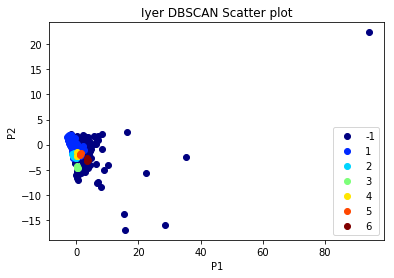

In [15]:

pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_clean)
# print(data_pca)



x = data_pca[:,0]
y = data_pca[:,1]
classes = np.unique(labels)
colors = [plt.cm.jet(i/float(len(classes)-1)) for i in range(len(classes))]
for i, u in enumerate(classes):
    xi = [x[j] for j  in range(len(x)) if labels[j] == u]
    yi = [y[j] for j  in range(len(x)) if labels[j] == u]
    plt.scatter(xi, yi, c=colors[i], label=str(u))
plt.legend()
plt.title('Iyer DBSCAN Scatter plot')
plt.xlabel('P1')
plt.ylabel('P2')

plt.show()
# fig = plt.figure()
# plt.savefig('pcaa.png')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

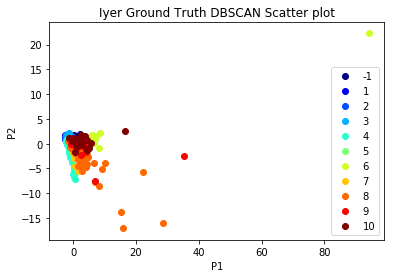

In [5]:
x = data_pca[:,0]
y = data_pca[:,1]
classes = np.unique(gtcluslist)
colors = [plt.cm.jet(i/float(len(classes)-1)) for i in range(len(classes))]
for i, u in enumerate(classes):
    xi = [x[j] for j  in range(len(x)) if gtcluslist[j] == u]
    yi = [y[j] for j  in range(len(x)) if gtcluslist[j] == u]
    plt.scatter(xi, yi, c=colors[i], label=str(u))
plt.legend()
plt.title('Iyer Ground Truth DBSCAN Scatter plot')
plt.xlabel('P1')
plt.ylabel('P2')

# plt.show()
# fig = plt.figure()
plt.savefig('Iyer Ground Truth DBSCAN Scatter plot.png')